In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as c

In [2]:
def gaussian(x,cont,inten,m,sigma):
    return cont - inten*np.exp(-((x-m)/sigma)**2)

# Con `numpy.correlate`

In [ ]:
np.array(fauma0)

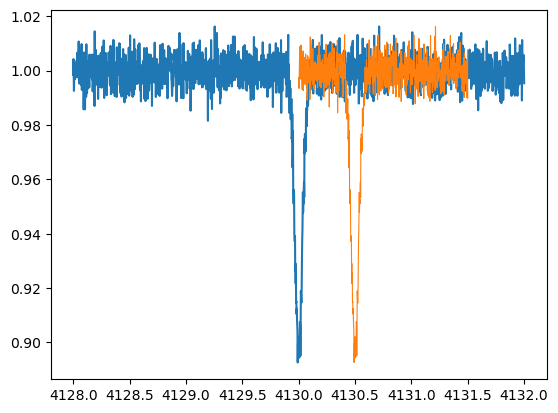

In [4]:
xx0 = np.linspace(4128, 4132, num=2000)
faux0=gaussian(xx0,cont=1,inten=0.1,m=4130,sigma=0.05)+np.random.normal(0.00,0.005,2000)
masked0=np.ma.masked_outside(xx0,4129.5,4131)
masked0 += np.ones_like(masked0)*0.5
mask0 = np.ma.getmask(masked0)
fauma0=np.array(np.ma.array(faux0,mask=mask0))

plt.plot(xx0,faux0)
plt.plot(masked0,fauma0,linewidth=0.8)

In [ ]:
cor=np.correlate(faux0,fauma0,'same')

In [ ]:
len(cor)

In [ ]:
plt.plot(xx0,cor)

Función de correlacion! Ahora tengo que transformar esto en una VR

In [ ]:
#esto da el valor en lambda donde se da el maximo de correlacion
xmax = xx0[np.argmax(cor)]
xmax 

esto me da el max en el array original, si suponemos que el template ya esta centrado, la diferencia en lambda sale y por lo tanto la vr

130.5 es la rest en este caso, porque moví el template

In [6]:
lambda0 = 4130.5
#c en m/s


In [ ]:
disp(xmax,lambda0)

In [9]:
disp = lambda x,x0 : c.c.to('km/s') * (x/x0 - 1) 
def correlate_velocity_line(spectrum_lambda,spectrum_flux,template,lambda0):
    """Returns velocity in km/s of observed line, based on template and rest lambda `lambda0`"""
    cor=np.correlate(spectrum_flux,template,'same')
    xmax = spectrum_lambda[np.argmax(cor)]
    return disp(xmax,lambda0)


In [10]:
correlate_velocity_line(xx0,faux0,fauma0,lambda0)

<Quantity -36.21747647 km / s>

# Shift and add